In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados
df = pd.read_csv('./dados.csv')

# Verificar as primeiras linhas do dataset
print(df.head())

# Verificar informações gerais
print(df.info())

# Verificar estatísticas descritivas
print(df.describe())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  ...  MntFishProducts  \
0             0             0             0  ...              172   
1             0             0             0  ...                2   
2             0             0             0  ...              111   
3             0             0             0  ...               10   
4             0             0             0  ...               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases NumWebPurchases  \
0                88            88           

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   AcceptedCmp3         2240 non-null   int64  
 8   AcceptedCmp4         2240 non-null   int64  
 9   AcceptedCmp5         2240 non-null   int64  
 10  AcceptedCmp1         2240 non-null   int64  
 11  AcceptedCmp2         2240 non-null   int64  
 12  Complain             2240 non-null   int64  
 13  Response             2240 non-null   int64  
 14  Dt_Customer          2240 non-null   object 
 15  Recency              2240 non-null   int64 

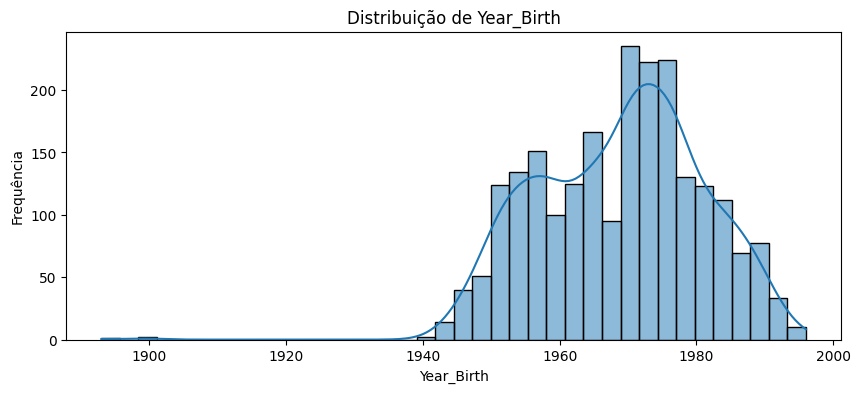

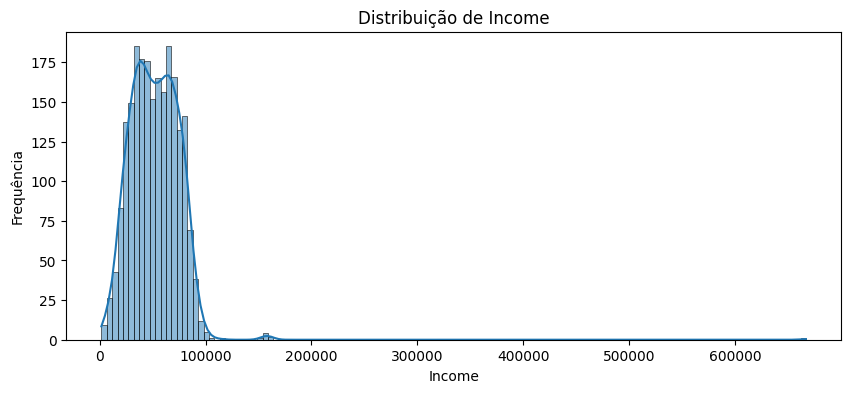

In [20]:
# Histogramas das variáveis contínuas
continuous_vars = ['Year_Birth', 'Income']  # Substitua pelos nomes reais das variáveis

for var in continuous_vars:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.show()

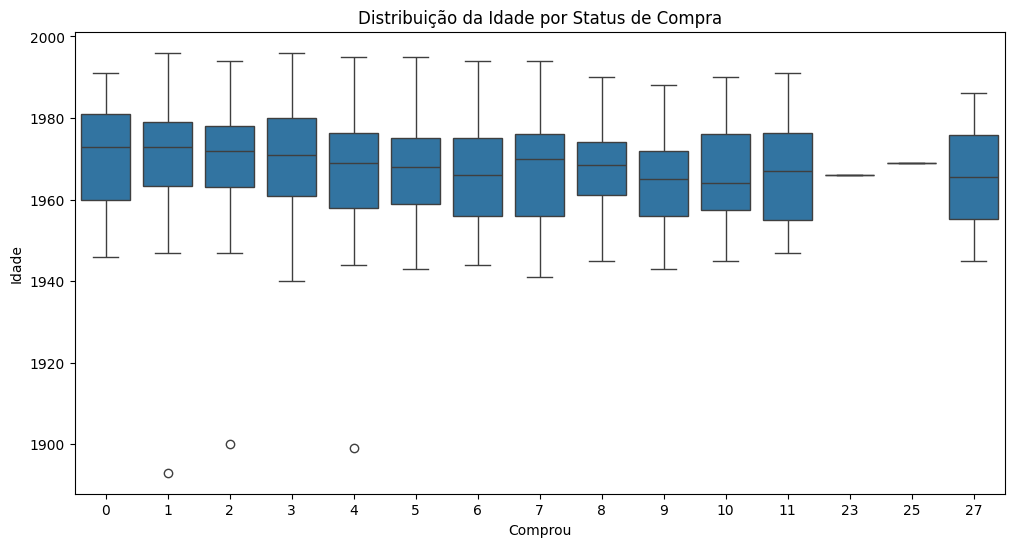

In [21]:
# Boxplots comparando características entre compradores e não compradores
plt.figure(figsize=(12, 6))
sns.boxplot(x='NumWebPurchases', y='Year_Birth', data=df)  # Substitua 'comprou' e 'idade' conforme necessário
plt.title('Distribuição da Idade por Status de Compra')
plt.xlabel('Comprou')
plt.ylabel('Idade')
plt.show()

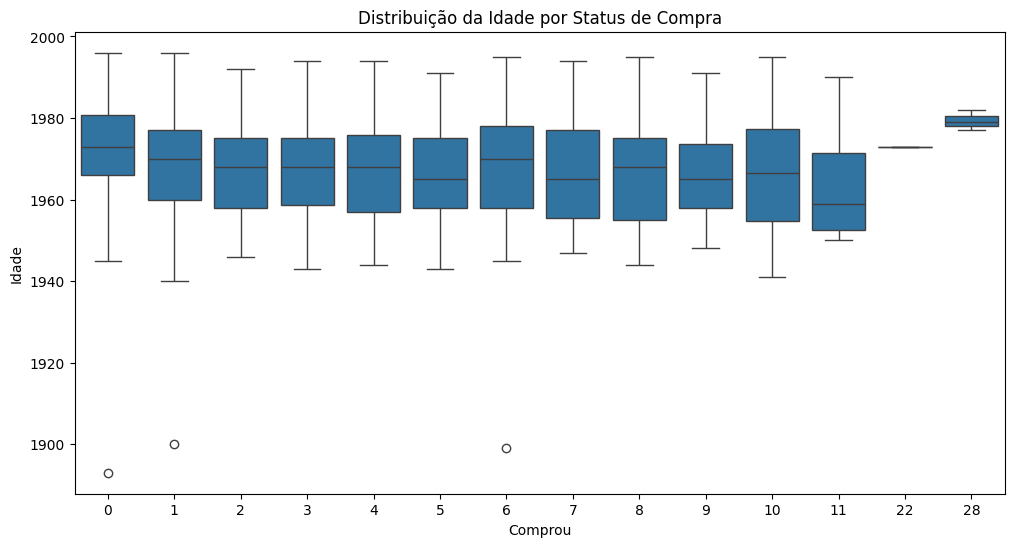

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='NumCatalogPurchases', y='Year_Birth', data=df)  # Substitua 'comprou' e 'idade' conforme necessário
plt.title('Distribuição da Idade por Status de Compra')
plt.xlabel('Comprou')
plt.ylabel('Idade')
plt.show()

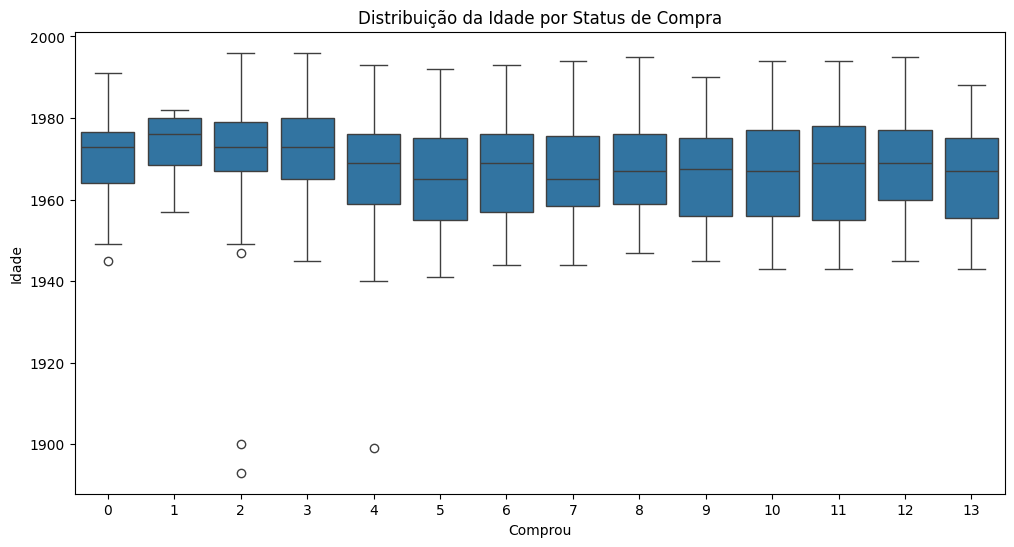

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='NumStorePurchases', y='Year_Birth', data=df)  # Substitua 'comprou' e 'idade' conforme necessário
plt.title('Distribuição da Idade por Status de Compra')
plt.xlabel('Comprou')
plt.ylabel('Idade')
plt.show()

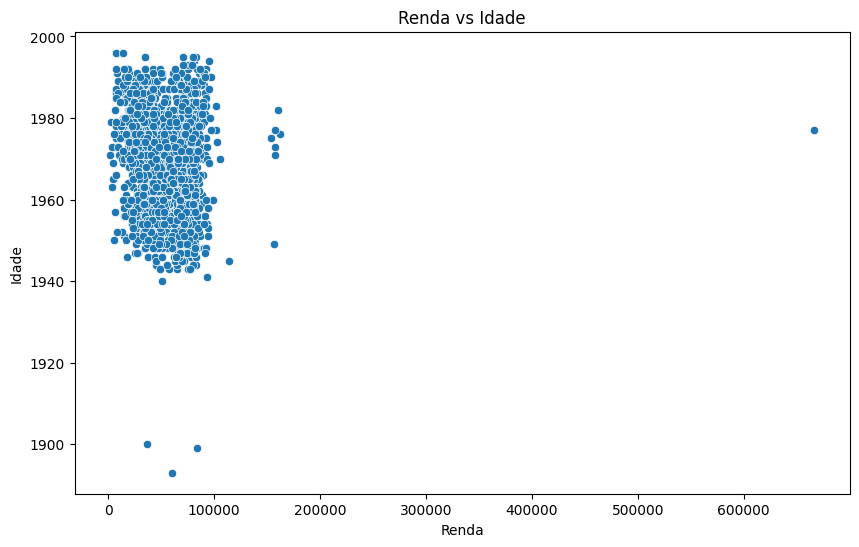

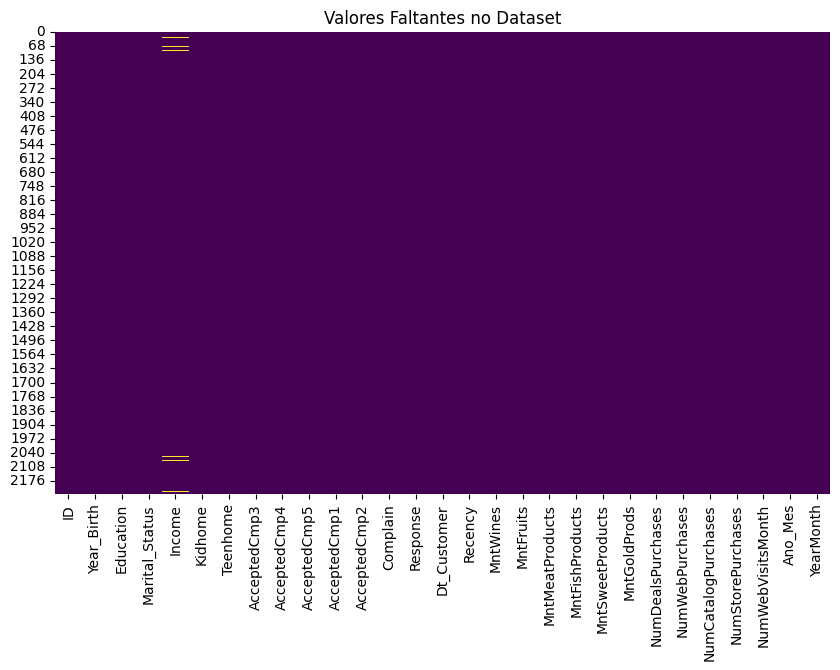

In [9]:
# Gráfico de dispersão para identificar outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Year_Birth', data=df)
plt.title('Renda vs Idade')
plt.xlabel('Renda')
plt.ylabel('Idade')
plt.show()

# Matriz de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Valores Faltantes no Dataset')
plt.show()

In [34]:
print("Número de linhas no DataFrame original:", len(df))
print("Número de linhas em X_scaled:", X_scaled.shape[0])


Número de linhas no DataFrame original: 2240
Número de linhas em X_scaled: 2216


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecionar variáveis contínuas para clustering
continuous_vars = ['Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Garantir que todas as variáveis selecionadas estão presentes no DataFrame
X = df[continuous_vars]

# Verificar se há valores ausentes
print("Valores ausentes em X:")
print(X.isnull().sum())

# Preencher valores ausentes ou remover linhas/colunas com valores ausentes
X = X.fillna(X.mean())  # Exemplo: preencher valores ausentes com a média

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


Valores ausentes em X:
Income                 24
Kidhome                 0
Teenhome                0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64


In [28]:
df = df.reset_index(drop=True)

In [38]:
# Remover linhas com valores ausentes
df_clean = df.dropna(subset=['Income'])

# Recriar X com as colunas contínuas
X_clean = df_clean[continuous_vars]
# Preencher valores ausentes na coluna 'Income' com a média
df['Income'] = df['Income'].fillna(df['Income'].mean())

# Recriar X com as colunas contínuas
X = df[continuous_vars]

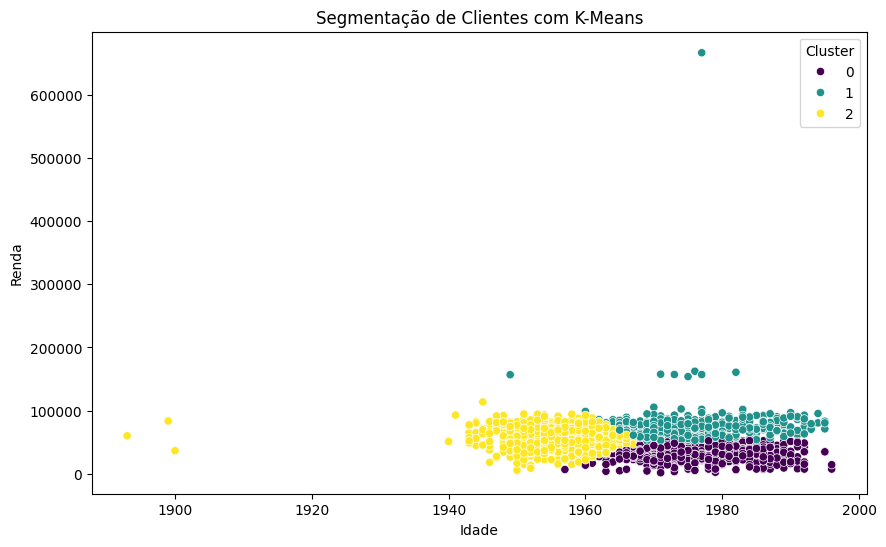

In [40]:
# Preencher valores ausentes na coluna 'Income' com a média
df['Income'] = df['Income'].fillna(df['Income'].mean())

# Recriar X com as colunas contínuas
X = df[continuous_vars]
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans

# Selecionar características para clustering
X = df[['Year_Birth', 'Income']].dropna()

# Normalizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajuste o número de clusters conforme necessário
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year_Birth', y='Income', hue='cluster', data=df, palette='viridis')
plt.title('Segmentação de Clientes com K-Means')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.legend(title='Cluster')
plt.show()

In [42]:
# Estatísticas dos clusters
print(df.groupby('cluster').agg({'Year_Birth': ['mean', 'std'], 'Income': ['mean', 'std']}))

          Year_Birth                  Income              
                mean       std          mean           std
cluster                                                   
0        1976.762899  7.064388  32252.850747  10857.180051
1        1975.432836  7.350507  72710.289817  28189.205420
2        1956.080194  6.723846  57030.033736  16824.007733


In [44]:
from sklearn.model_selection import train_test_split

# Separar features e target
X = df[['Year_Birth', 'Income']].dropna()
y = df['NumWebPurchases'].dropna()  # Substitua 'comprou' pelo nome real da coluna target

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [45]:
from sklearn.model_selection import train_test_split

# Separar features e target
X = df[['Year_Birth', 'Income']].dropna()
y = df['NumStorePurchases'].dropna()  # Substitua 'comprou' pelo nome real da coluna target

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
from sklearn.model_selection import train_test_split

# Separar features e target
X = df[['Year_Birth', 'Income']].dropna()
y = df['NumCatalogPurchases'].dropna()  # Substitua 'comprou' pelo nome real da coluna target

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Avaliação
print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, y_prob)}')

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.show()


              precision    recall  f1-score   support

           0       0.55      0.66      0.60       156
           1       0.44      0.41      0.42       150
           2       0.35      0.29      0.32        95
           3       0.14      0.14      0.14        57
           4       0.23      0.18      0.20        60
           5       0.28      0.24      0.26        46
           6       0.26      0.29      0.27        42
           7       0.21      0.27      0.24        22
           8       0.38      0.29      0.33        17
           9       0.21      0.31      0.25        13
          10       0.08      0.09      0.09        11
          11       0.20      0.33      0.25         3

    accuracy                           0.37       672
   macro avg       0.28      0.29      0.28       672
weighted avg       0.37      0.37      0.37       672



ValueError: multi_class must be in ('ovo', 'ovr')